In [3]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Change the current working directory to the correct folder
import os

# Use the correct folder path with the exact capitalization and the space
# Python handles spaces in strings just fine when passed to os.chdir
correct_path = '/content/drive/My Drive/Colab Notebooks/ML_C1W2Labs/Files/home/jovyan/work/images'
os.chdir(correct_path)

print(f"Current working directory: {os.getcwd()}")


from PIL import Image
import numpy as np

# Assumes you uploaded 'input_image.png' via the Colab GUI
image_path = 'C1_W2_Lab06_contours.PNG'
img = Image.open(image_path)
img_array = np.array(img)

print("Pixel data snippet (top left 5x5 pixels):")
print(img_array[:5, :5, :])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/My Drive/Colab Notebooks/ML_C1W2Labs/Files/home/jovyan/work/images
Pixel data snippet (top left 5x5 pixels):
[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


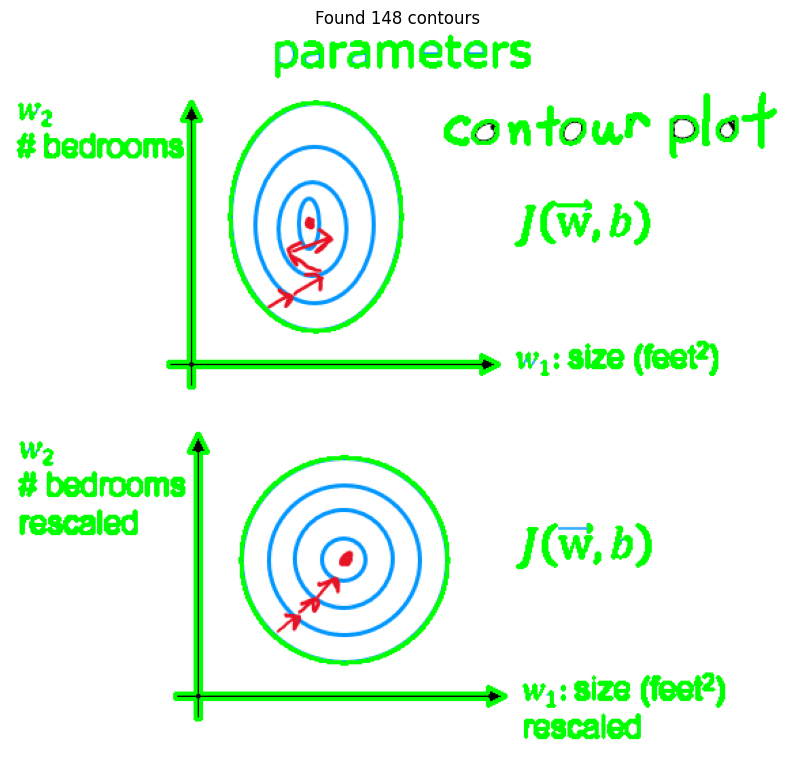

In [4]:
# Install OpenCV in Colab if you haven't already
!pip install opencv-python

import cv2
import matplotlib.pyplot as plt

# Your existing code to load the image
image_path = 'C1_W2_Lab06_contours.PNG'
img_bgr = cv2.imread(image_path) # OpenCV reads in BGR format
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # Convert to RGB for correct display

# 1. Convert to grayscale (contours require a single-channel binary image)
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# 2. Apply thresholding to get a binary image
# The boundary between black and white pixels becomes the contour boundary
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# 3. Find the contours
# RETR_EXTERNAL retrieves only the outer contours of your two diagrams
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 4. Draw the detected contours on the original color image
cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 2) # Draws in green with thickness 2

# 5. Display the result in Colab
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title(f"Found {len(contours)} contours")
plt.axis('off')
plt.show()
